In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_optical_values = r"../../Data/optical-rs/optical_values.csv"

In [3]:
df = pd.read_csv(path_optical_values)

# cap all values of above 5 to 5
df["optical_values"] = df["optical_values"].apply(lambda x: 5 if x > 5 else x)

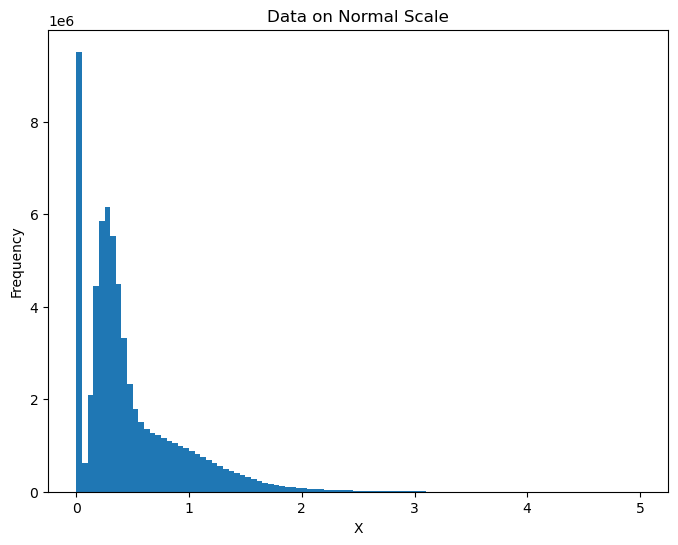

In [3]:
# Plot transformed data on a log scale
plt.figure(figsize=(8, 6))
plt.hist(df["optical_values"], bins=100)
plt.title('Data on Normal Scale')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

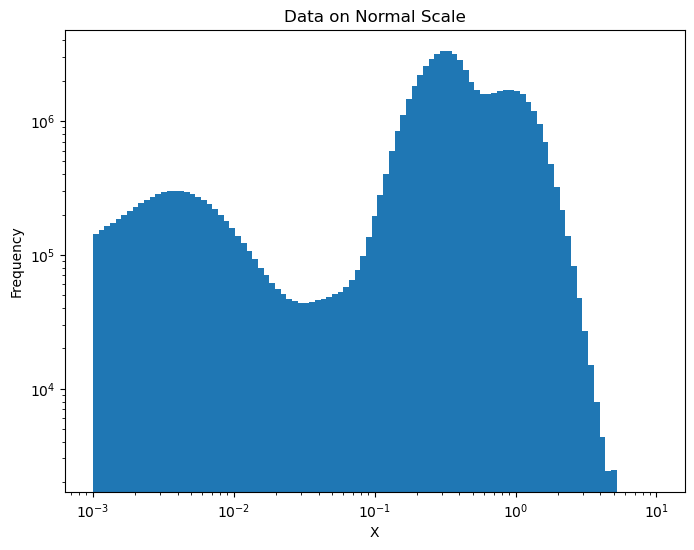

In [5]:
# Plot transformed data on a log scale
plt.figure(figsize=(8, 6))
plt.hist(df["optical_values"], bins=np.logspace(-3, 1, 100))
plt.title('Data on Normal Scale')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [5]:
# apply log transformation of the optical values + 1 (to prevent log(0)) and save as a new column
df['log_transform'] = np.log10(1 + df['optical_values'])

# apply z-score transformation and save as a new column
df['zscore_transform'] = (df['optical_values'] - df['optical_values'].mean()) / df['optical_values'].std()

# apply z-score transformation to log-transformed data and save as a new column
df['zscore_transform_log'] = (df['log_transform'] - df['log_transform'].mean()) / df['log_transform'].std()

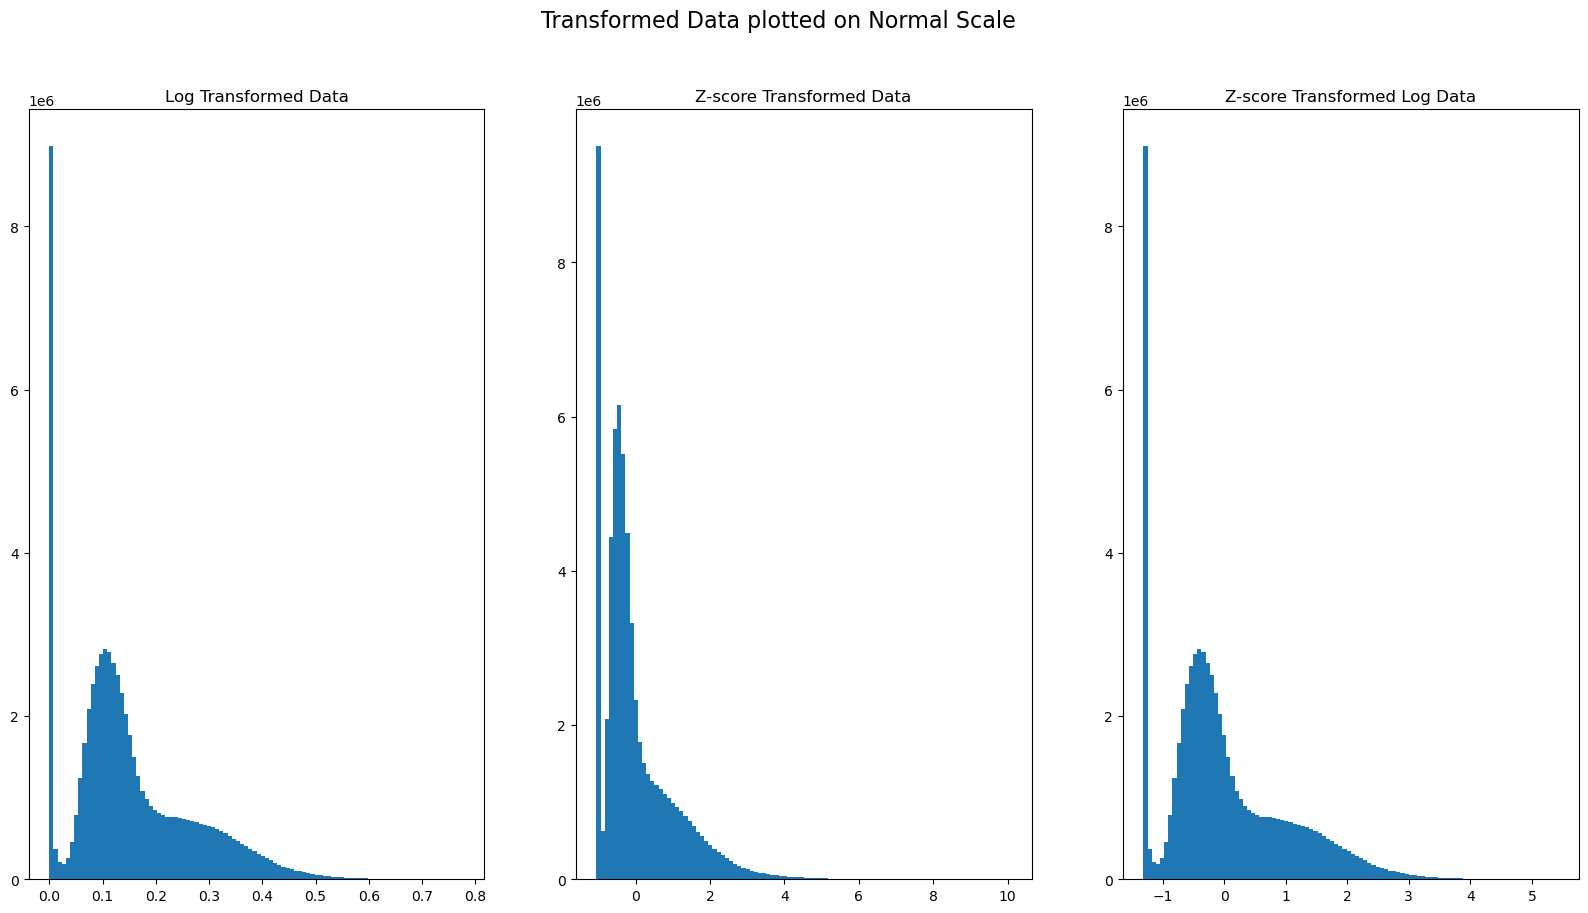

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Transformed Data plotted on Normal Scale', fontsize=16)

ax[0].hist(df["log_transform"], bins=100)
ax[0].set_title('Log Transformed Data')

ax[1].hist(df["zscore_transform"], bins=100)
ax[1].set_title('Z-score Transformed Data')

ax[2].hist(df["zscore_transform_log"], bins=100)
ax[2].set_title('Z-score Transformed Log Data')


plt.show()

**We decide to apply log transformation to the target variable.**